In [168]:
!pip install prophet


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [169]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [170]:
# Imported Fact Order dataset
factOrder_df = pd.read_csv('FactOrder.csv')


# Find number of rows and columns of the dataset
print(factOrder_df.shape)

(1399850, 16)


In [171]:
factOrder_df

,OrderNumber,OrderRowNumber,ArticleKey,ArticleName,Colour,ArticleGenre,Size,ArticleGroupName,Collection,SizeGroup,BabyJunior,ArticleMaterial,DateOrderedKey,QuantityOrdered,Amount,Cost
0,94444500,1,31182,Artikel 31182,NaN,Övrigt,NaN,VAT,Base,NaN,NaN,NaN,20180102,1.0,997.83,0.00
1,94543600,2,47942,Artikel 47942,red,DRESSES LS WOVEN,116/122,DRESSES,Main,6[116-122],3 KIDS,NaN,20180103,1.0,375.69,70.67
2,94543600,3,6763,Artikel 6763,light grey,SWEATSHIRTS,92/98,TOPS,Main,4[92-98],2 TODDLER,NaN,20180103,1.0,178.75,68.44
3,94543700,1,20870,Artikel 20870,offwhite,TEES LS,80/86,TOPS,Main,3[80-86],2 TODDLER,NaN,20180103,1.0,187.53,25.67
4,94543700,2,38070,Artikel 38070,light grey,SWEATSHIRTS,80/86,TOPS,Main,3[80-86],2 TODDLER,NaN,20180103,1.0,178.75,68.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399845,116135100,3,56158,Artikel 56158,Blue,TEES LS,104/110,TOPS,Main,5[104-110],3 KIDS,JERSEY,20201223,1.0,99.04,47.75
1399846,116135100,4,33839,Artikel 33839,Blue,TROUSERS JERSEY,92/98,BOTTOMS,Main,4[92-98],2 TODDLER,JERSEY,20201223,1.0,99.04,46.61
1399847,116135100,5,54492,Artikel 54492,Offwhite,LEGGINGS,92/98,BOTTOMS,Pre,4[92-98],2 TODDLER,JERSEY,20201223,1.0,104.54,47.58
1399848,116135100,6,35487,Artikel 35487,Offwhite,TEES SS,104/110,TOPS,Pre,5[104-110],3 KIDS,JERSEY,20201223,1.0,99.04,45.55


In [172]:
# Get column datatypes and check for null values
factOrder_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399850 entries, 0 to 1399849
Data columns (total 16 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   OrderNumber       1399850 non-null  int64  
 1   OrderRowNumber    1399850 non-null  int64  
 2   ArticleKey        1399850 non-null  int64  
 3   ArticleName       1399850 non-null  object 
 4   Colour            1385814 non-null  object 
 5   ArticleGenre      1399705 non-null  object 
 6   Size              1385789 non-null  object 
 7   ArticleGroupName  1399850 non-null  object 
 8   Collection        1399705 non-null  object 
 9   SizeGroup         1379516 non-null  object 
 10  BabyJunior        1379516 non-null  object 
 11  ArticleMaterial   1140321 non-null  object 
 12  DateOrderedKey    1399850 non-null  int64  
 13  QuantityOrdered   1399850 non-null  float64
 14  Amount            1399850 non-null  float64
 15  Cost              1399850 non-null  float64
dtype

In [173]:
# Check for null values
factOrder_df.isnull().sum()

OrderNumber              0
OrderRowNumber           0
ArticleKey               0
ArticleName              0
Colour               14036
ArticleGenre           145
Size                 14061
ArticleGroupName         0
Collection             145
SizeGroup            20334
BabyJunior           20334
ArticleMaterial     259529
DateOrderedKey           0
QuantityOrdered          0
Amount                   0
Cost                     0
dtype: int64

In [174]:
# Check for duplicates
factOrder_df_dup = factOrder_df[factOrder_df.duplicated(keep='first')]
factOrder_df_dup

,OrderNumber,OrderRowNumber,ArticleKey,ArticleName,Colour,ArticleGenre,Size,ArticleGroupName,Collection,SizeGroup,BabyJunior,ArticleMaterial,DateOrderedKey,QuantityOrdered,Amount,Cost


In [175]:
factOrder_df['DateOrderedKey'] = factOrder_df['DateOrderedKey'].astype(str)
factOrder_df['DateOrderedMonth'] = pd.to_datetime(factOrder_df['DateOrderedKey'])
factOrder_df['DateOrderedMonth'] = factOrder_df['DateOrderedMonth'].dt.strftime('%m-%Y')

#factOrder_df = factOrder_df.drop('DateOrderedKey', axis=1)
factOrder_df

,OrderNumber,OrderRowNumber,ArticleKey,ArticleName,Colour,ArticleGenre,Size,ArticleGroupName,Collection,SizeGroup,BabyJunior,ArticleMaterial,DateOrderedKey,QuantityOrdered,Amount,Cost,DateOrderedMonth
0,94444500,1,31182,Artikel 31182,NaN,Övrigt,NaN,VAT,Base,NaN,NaN,NaN,20180102,1.0,997.83,0.00,01-2018
1,94543600,2,47942,Artikel 47942,red,DRESSES LS WOVEN,116/122,DRESSES,Main,6[116-122],3 KIDS,NaN,20180103,1.0,375.69,70.67,01-2018
2,94543600,3,6763,Artikel 6763,light grey,SWEATSHIRTS,92/98,TOPS,Main,4[92-98],2 TODDLER,NaN,20180103,1.0,178.75,68.44,01-2018
3,94543700,1,20870,Artikel 20870,offwhite,TEES LS,80/86,TOPS,Main,3[80-86],2 TODDLER,NaN,20180103,1.0,187.53,25.67,01-2018
4,94543700,2,38070,Artikel 38070,light grey,SWEATSHIRTS,80/86,TOPS,Main,3[80-86],2 TODDLER,NaN,20180103,1.0,178.75,68.44,01-2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399845,116135100,3,56158,Artikel 56158,Blue,TEES LS,104/110,TOPS,Main,5[104-110],3 KIDS,JERSEY,20201223,1.0,99.04,47.75,12-2020
1399846,116135100,4,33839,Artikel 33839,Blue,TROUSERS JERSEY,92/98,BOTTOMS,Main,4[92-98],2 TODDLER,JERSEY,20201223,1.0,99.04,46.61,12-2020
1399847,116135100,5,54492,Artikel 54492,Offwhite,LEGGINGS,92/98,BOTTOMS,Pre,4[92-98],2 TODDLER,JERSEY,20201223,1.0,104.54,47.58,12-2020
1399848,116135100,6,35487,Artikel 35487,Offwhite,TEES SS,104/110,TOPS,Pre,5[104-110],3 KIDS,JERSEY,20201223,1.0,99.04,45.55,12-2020


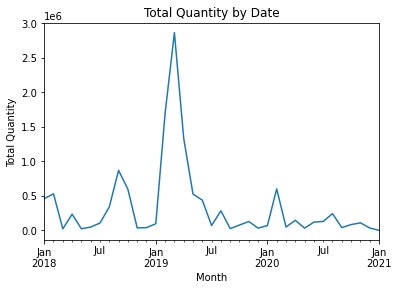

In [176]:
factOrder_df.DateOrderedMonth =  pd.to_datetime(factOrder_df['DateOrderedMonth'], format= '%m-%Y')

total_by_date = factOrder_df.groupby(factOrder_df.DateOrderedMonth)['QuantityOrdered'].sum()
total_by_date.plot()
plt.title('Total Quantity by Date')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.show()

# Preprocessing the dataset

In [177]:
ArticleGenre_df = pd.DataFrame(factOrder_df['ArticleGenre'].dropna().unique(), columns=['ArticleGenre'])
ArticleGenre_df

,ArticleGenre
0,Övrigt
1,DRESSES LS WOVEN
2,SWEATSHIRTS
3,TEES LS
4,TEES SS
...,...
79,Jackets
80,Postcards
81,Party
82,Shoes


In [178]:
factOrder_df = factOrder_df.groupby(['DateOrderedMonth', 'ArticleGenre']).sum('QuantityOrdered')
factOrder_df = factOrder_df.reset_index()
factOrder_df = factOrder_df[['DateOrderedMonth', 'QuantityOrdered', 'ArticleGenre']]

factOrder_df

,DateOrderedMonth,QuantityOrdered,ArticleGenre
0,2018-01-01,1121.0,BABY BOOTS
1,2018-01-01,5.0,BABY KIT
2,2018-01-01,4167.0,BAGS
3,2018-01-01,4.0,BATH
4,2018-01-01,12684.0,BEANIES
...,...,...,...
2391,2021-01-01,3.0,TROUSERS UNPADDED
2392,2021-01-01,1.0,TROUSERS WCT
2393,2021-01-01,3.0,TROUSERS WOVEN
2394,2021-01-01,3.0,UNDERWEAR


23:20:44 - cmdstanpy - INFO - Chain [1] start processing
23:20:44 - cmdstanpy - INFO - Chain [1] done processing
23:20:45 - cmdstanpy - INFO - Chain [1] start processing
23:20:45 - cmdstanpy - INFO - Chain [1] done processing
23:20:46 - cmdstanpy - INFO - Chain [1] start processing
23:20:46 - cmdstanpy - INFO - Chain [1] done processing
23:20:46 - cmdstanpy - INFO - Chain [1] start processing
23:20:46 - cmdstanpy - INFO - Chain [1] done processing
23:20:47 - cmdstanpy - INFO - Chain [1] start processing
23:20:47 - cmdstanpy - INFO - Chain [1] done processing
23:20:48 - cmdstanpy - INFO - Chain [1] start processing
23:20:48 - cmdstanpy - INFO - Chain [1] done processing
23:20:48 - cmdstanpy - INFO - Chain [1] start processing
23:20:48 - cmdstanpy - INFO - Chain [1] done processing
23:20:49 - cmdstanpy - INFO - Chain [1] start processing
23:20:49 - cmdstanpy - INFO - Chain [1] done processing
23:20:50 - cmdstanpy - INFO - Chain [1] start processing
23:20:50 - cmdstanpy - INFO - Chain [1]

ValueError: Dataframe has less than 2 non-NaN rows.

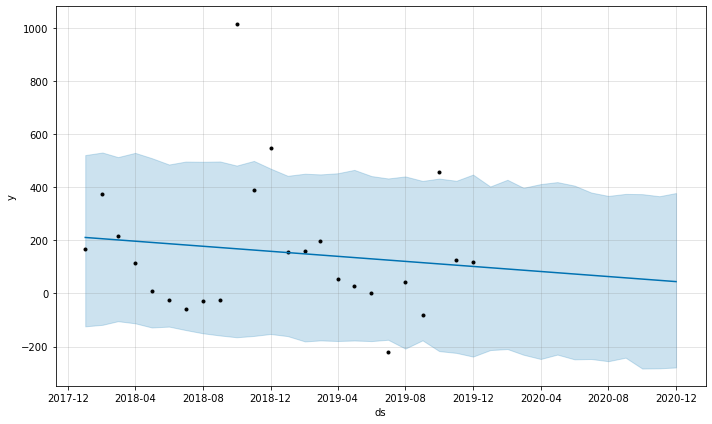

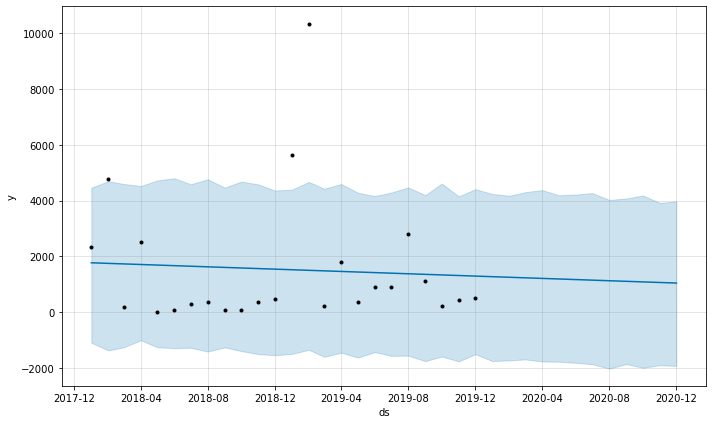

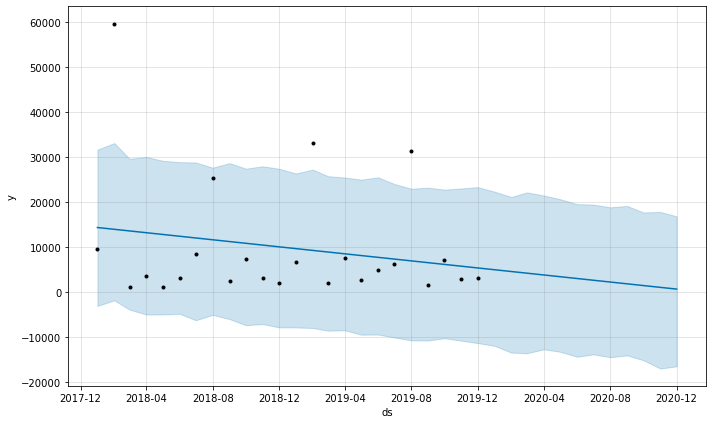

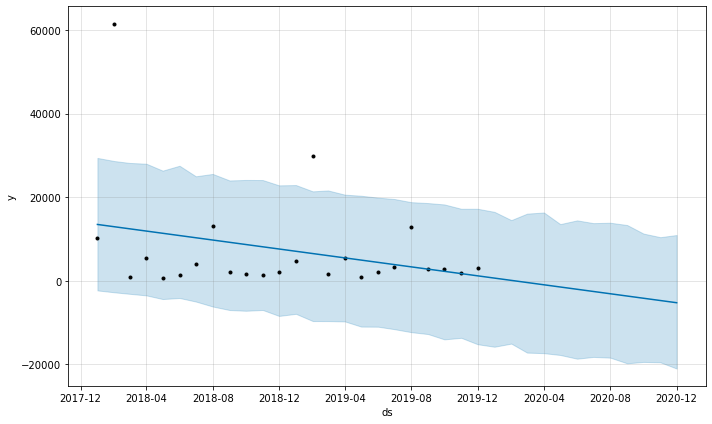

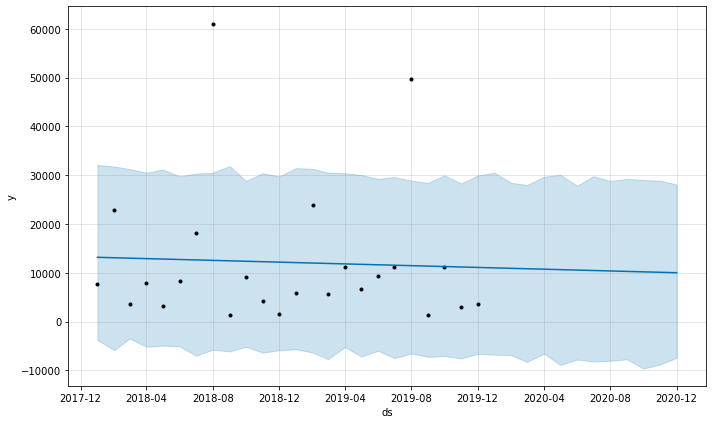

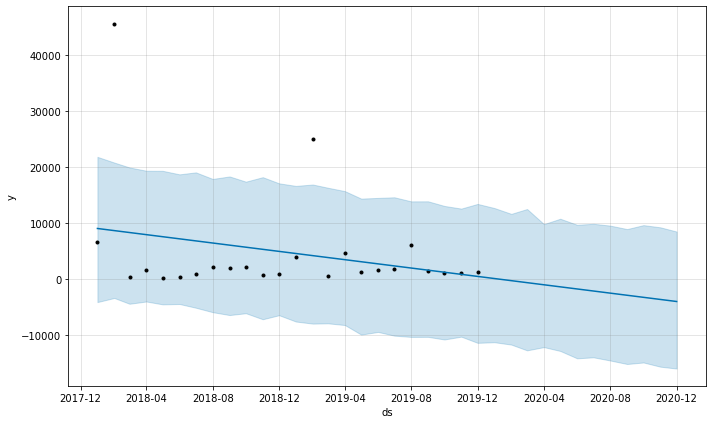

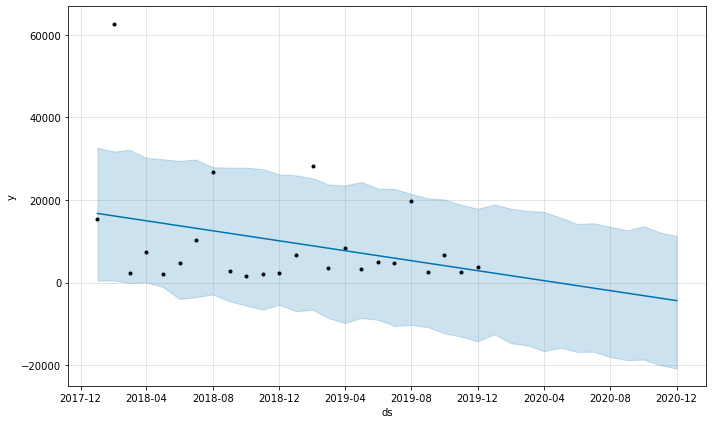

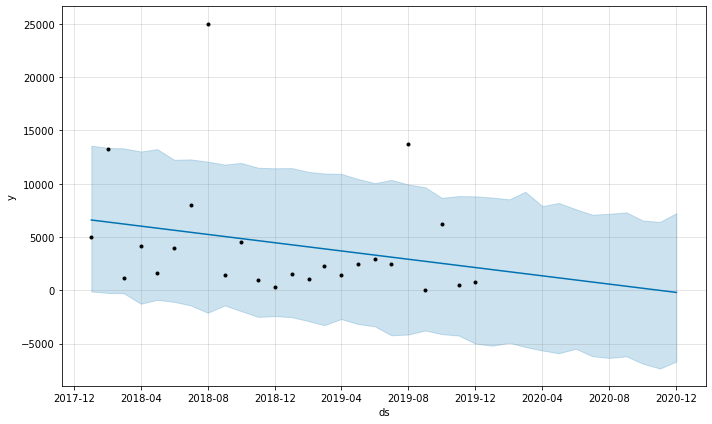

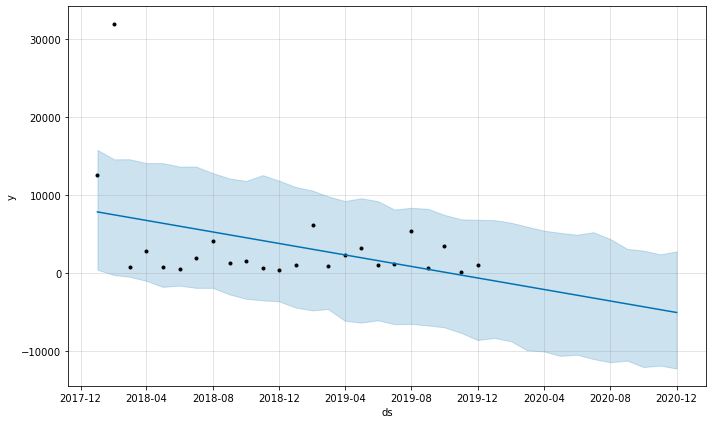

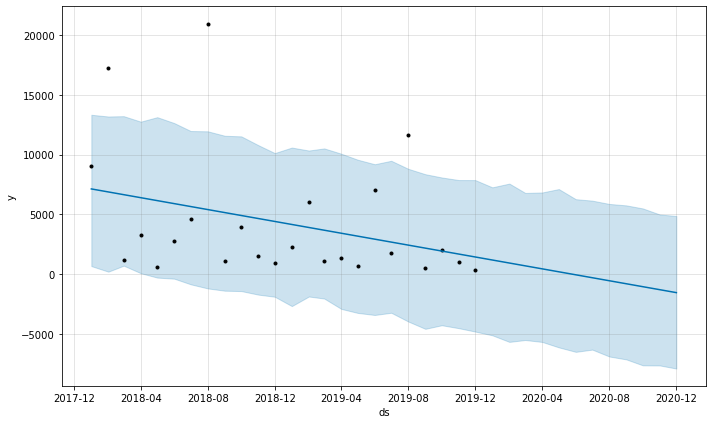

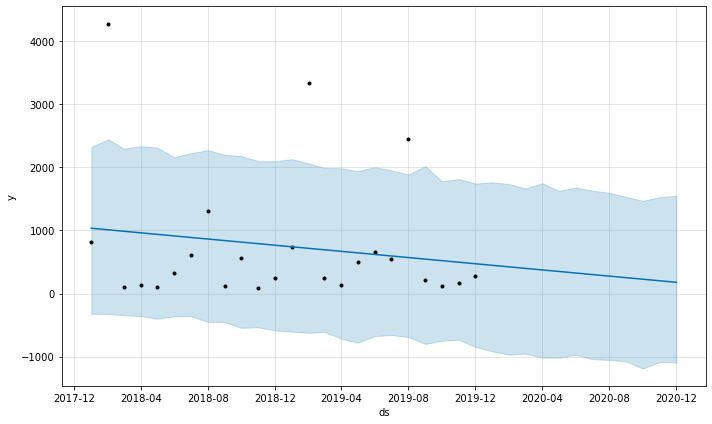

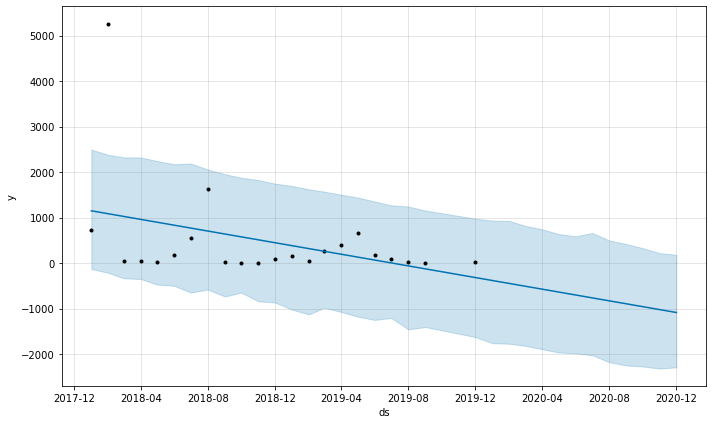

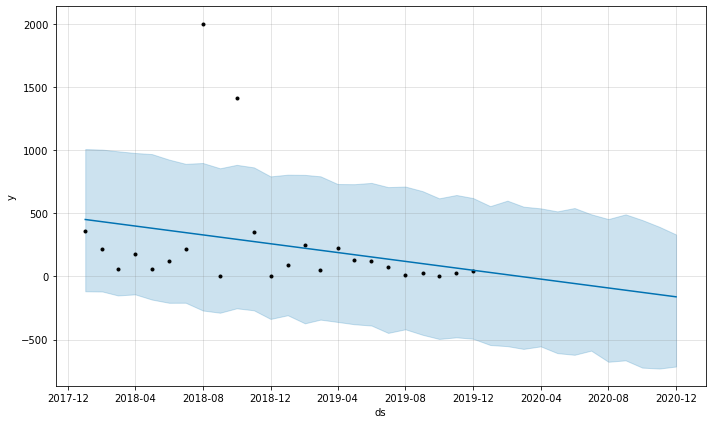

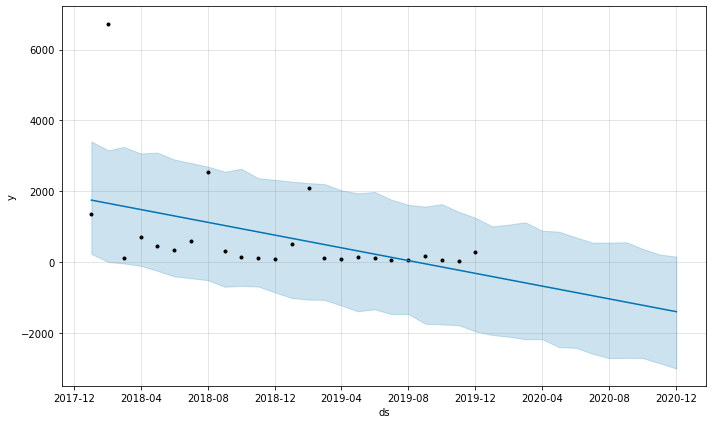

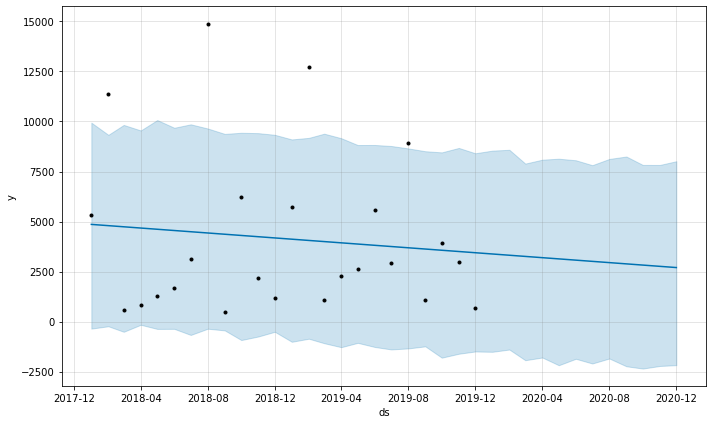

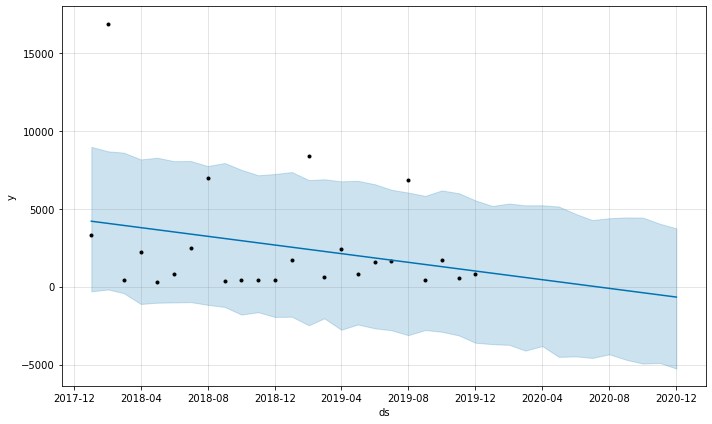

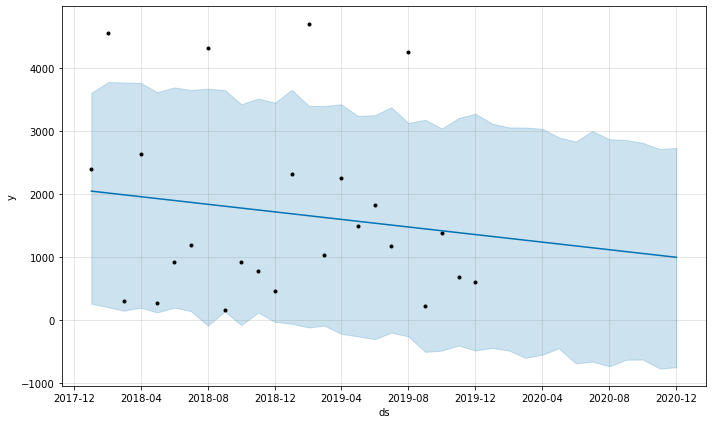

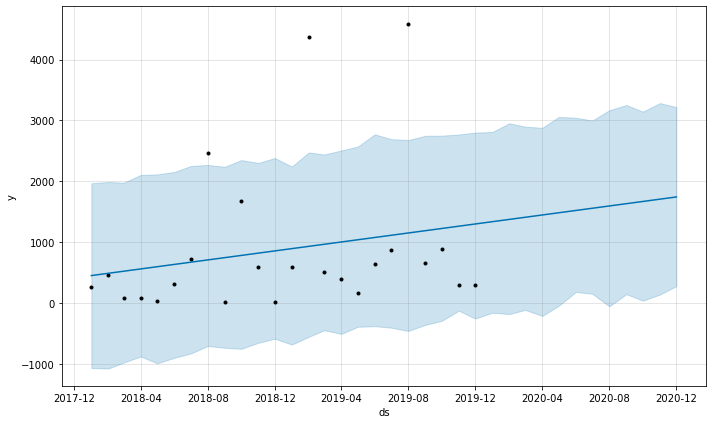

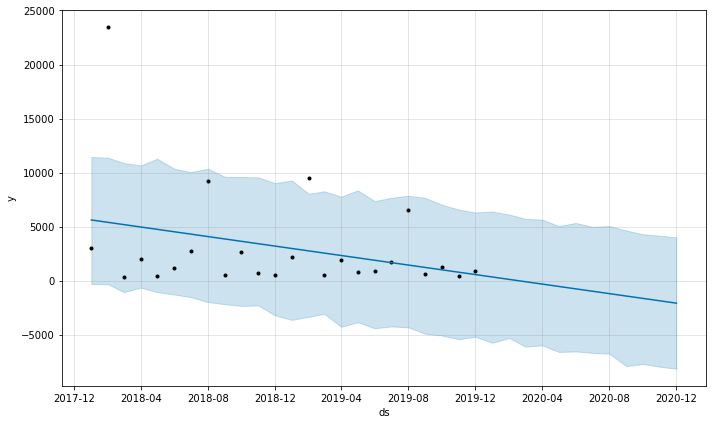

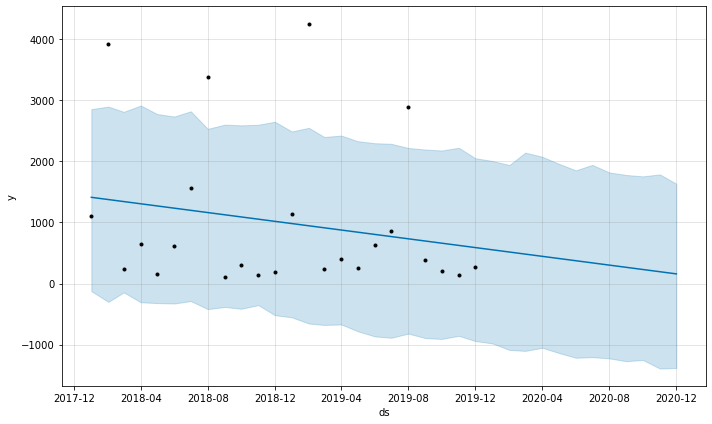

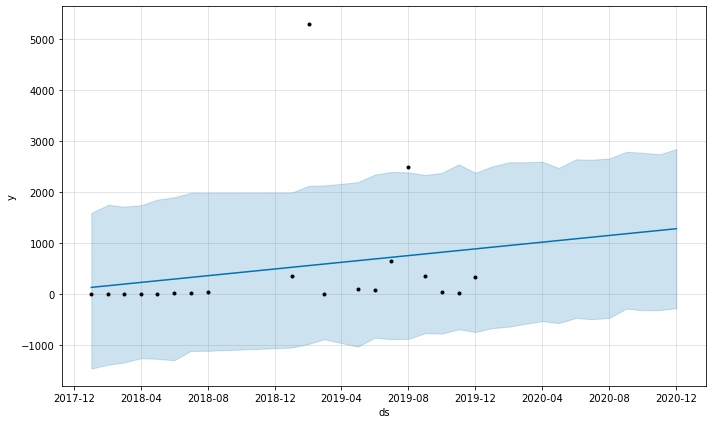

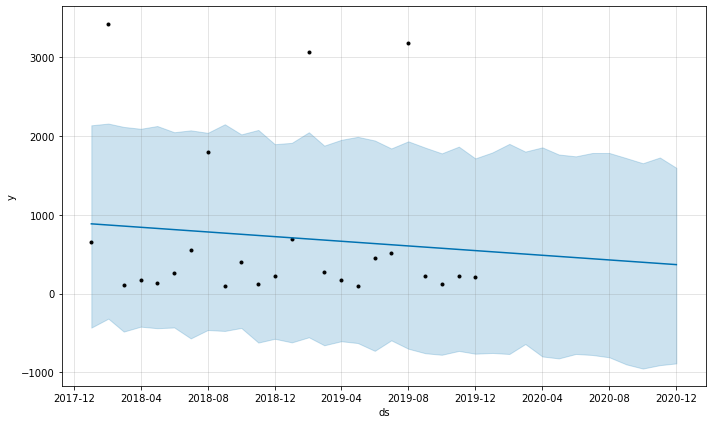

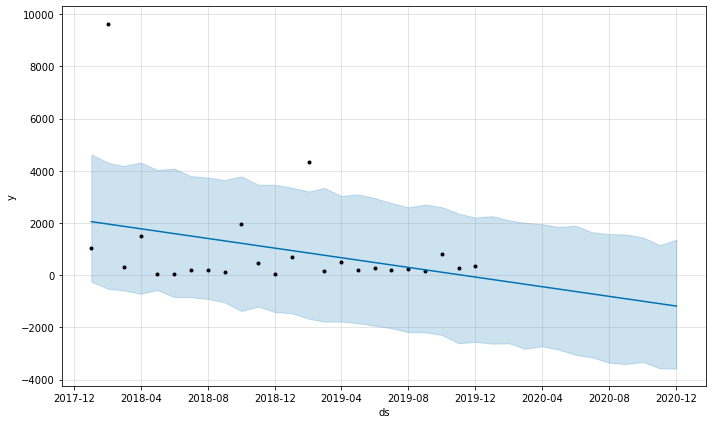

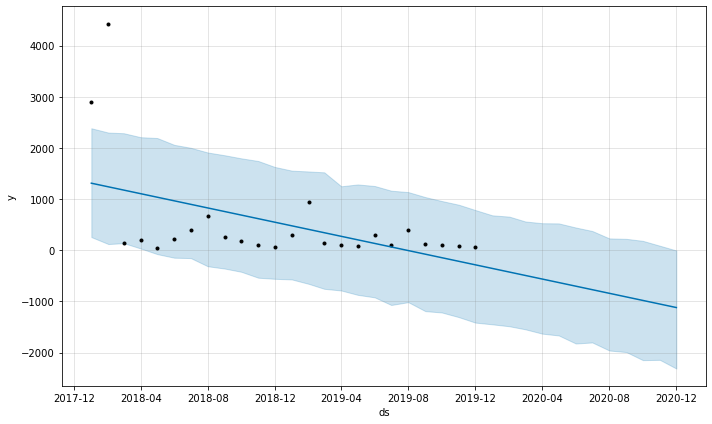

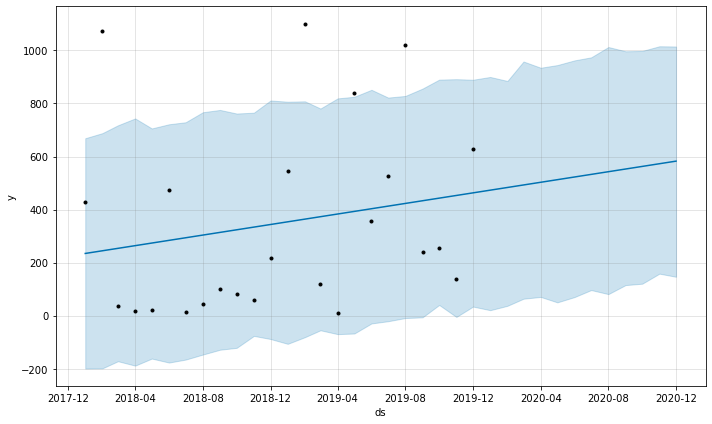

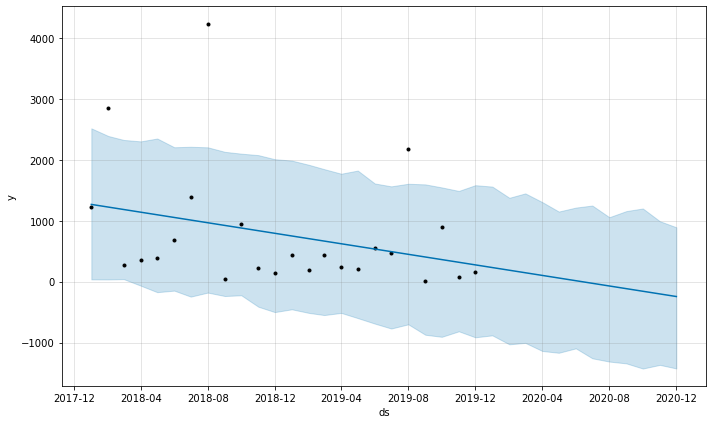

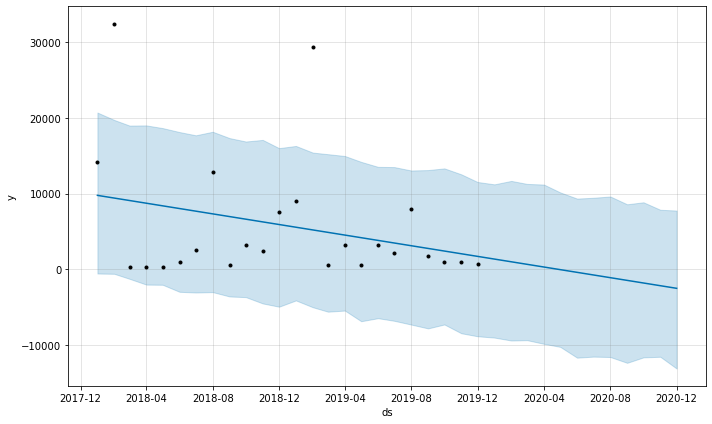

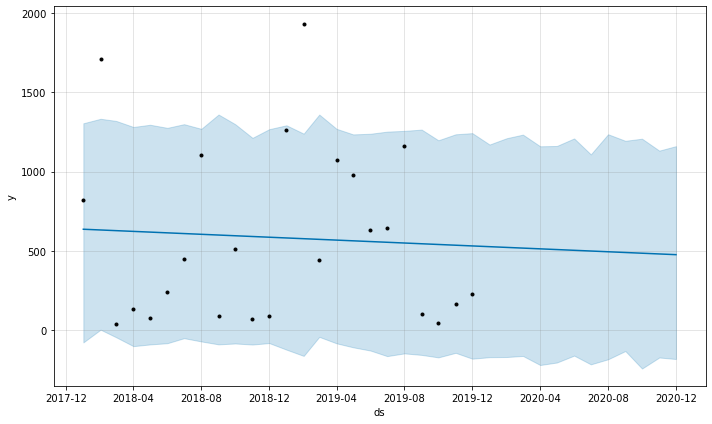

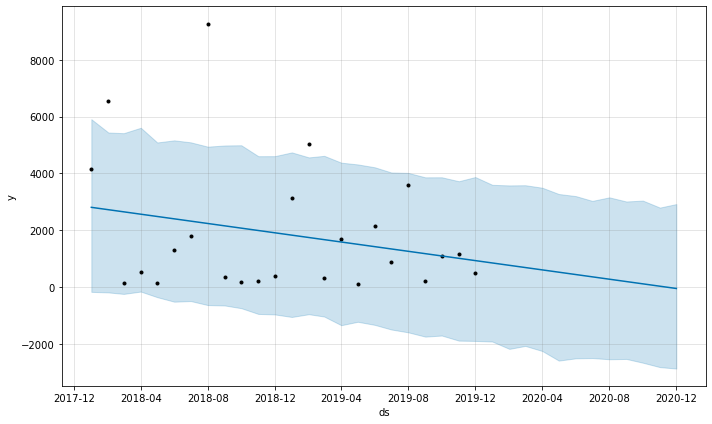

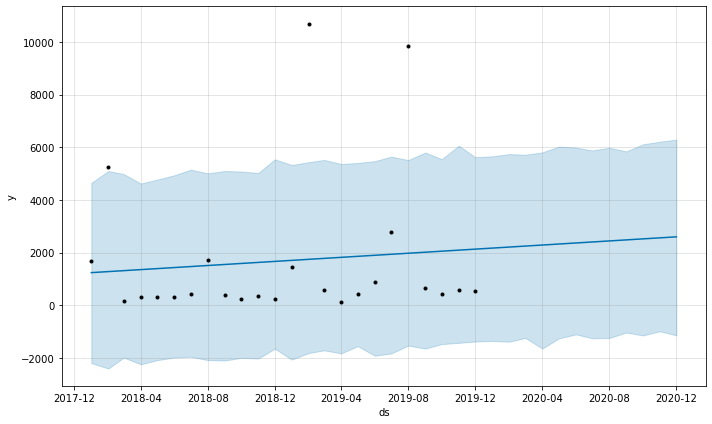

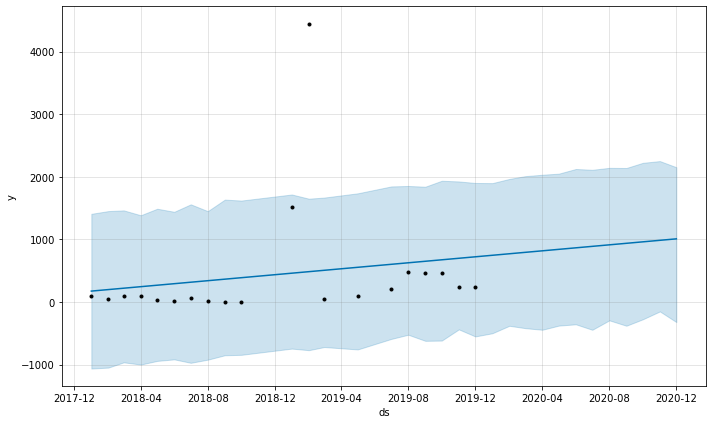

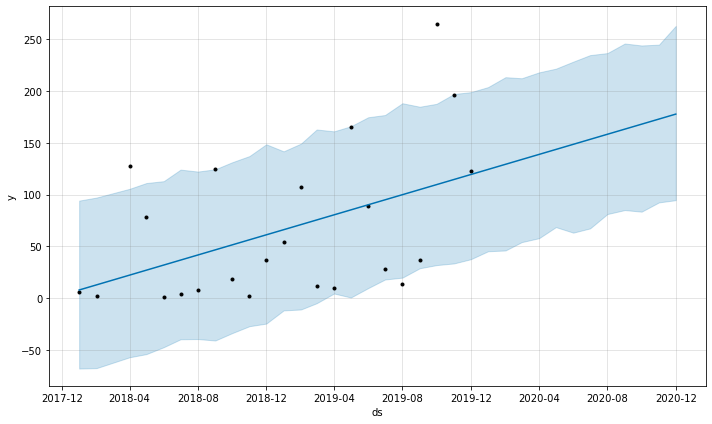

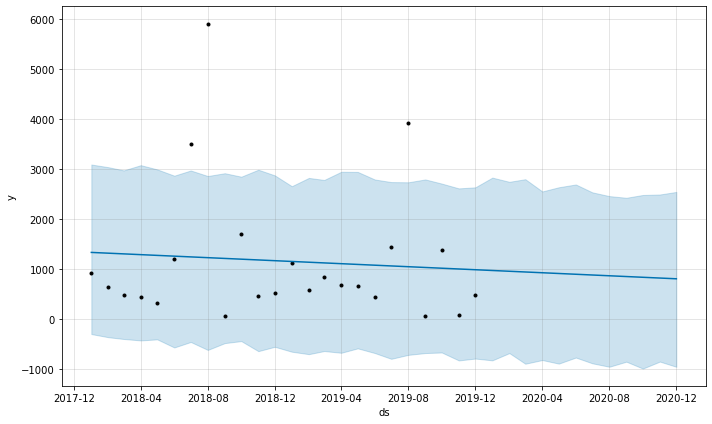

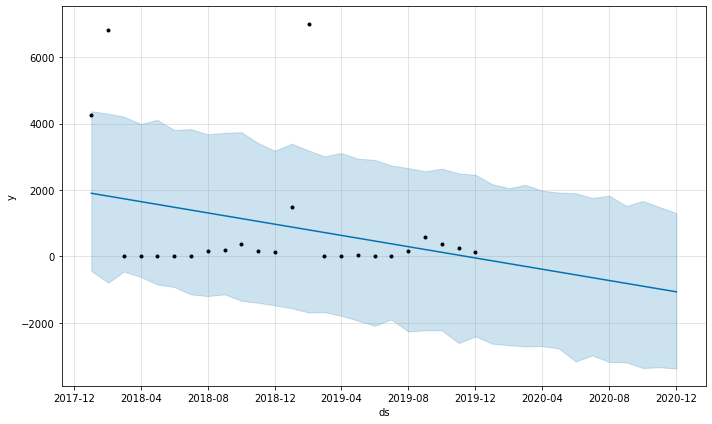

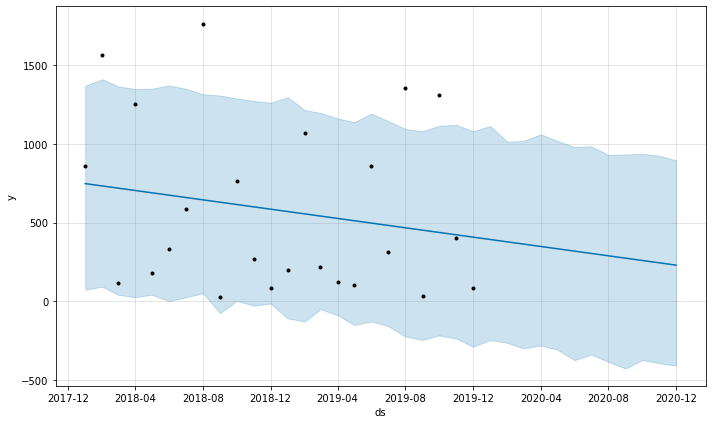

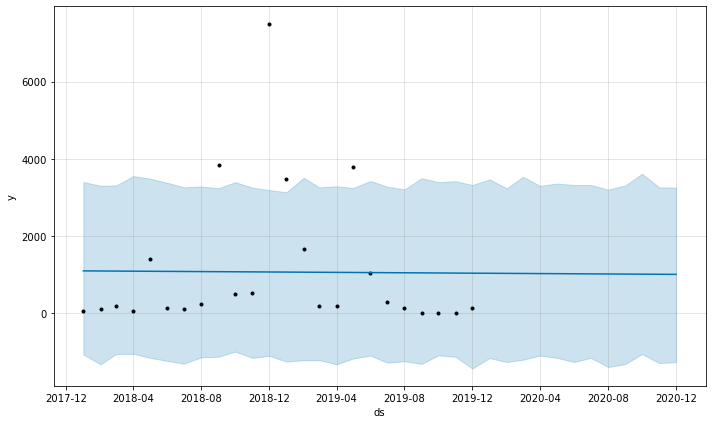

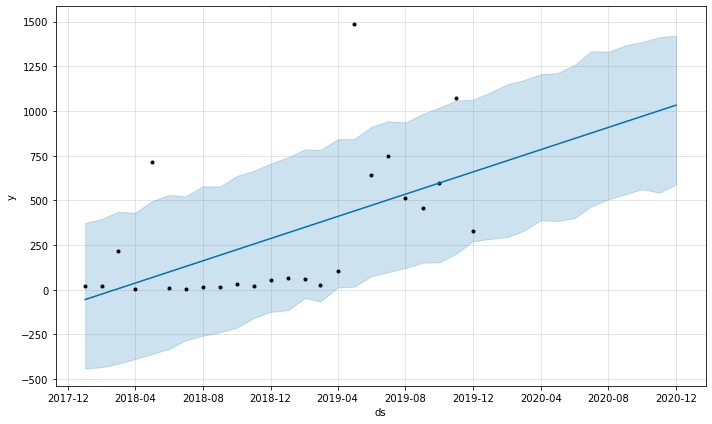

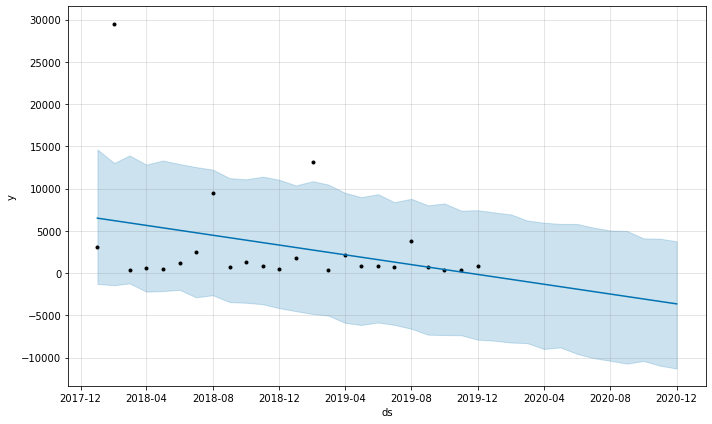

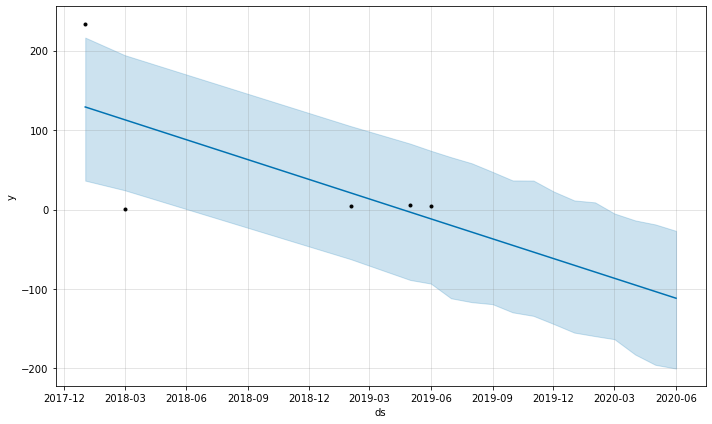

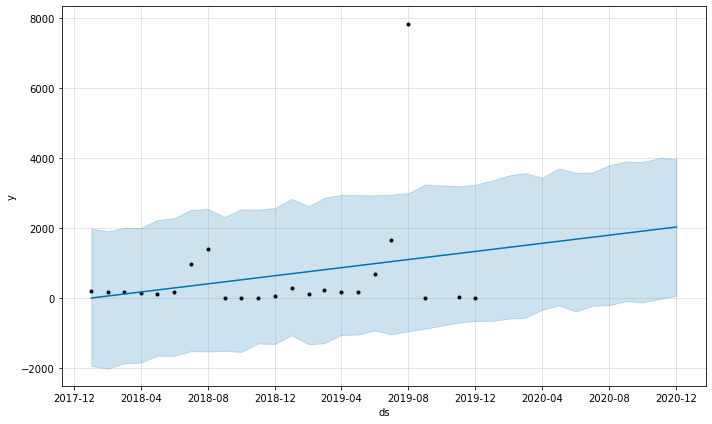

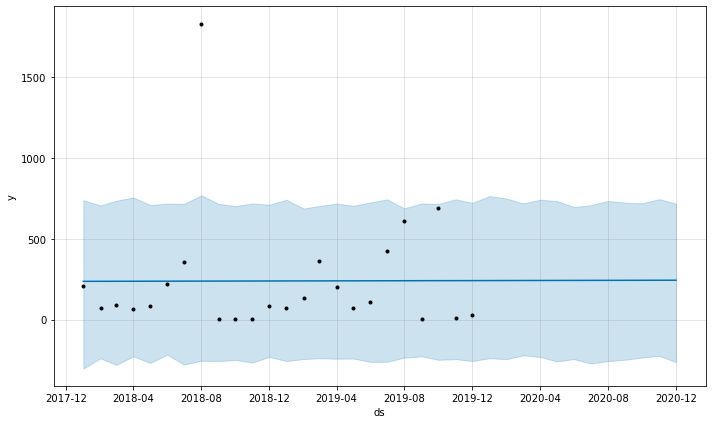

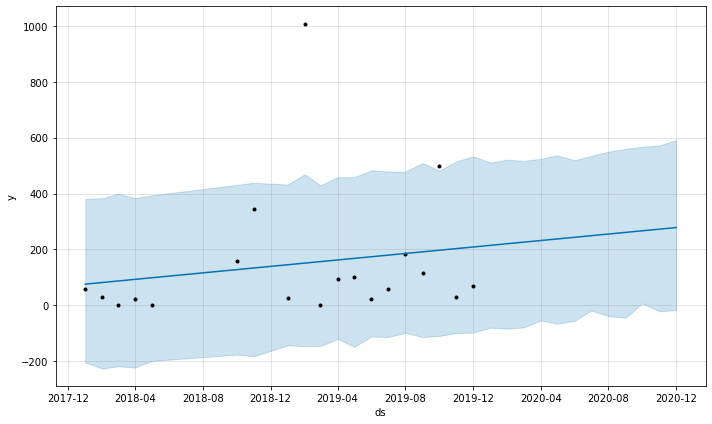

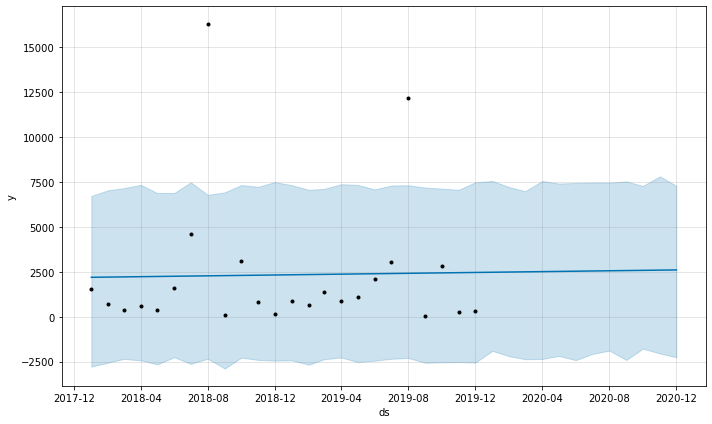

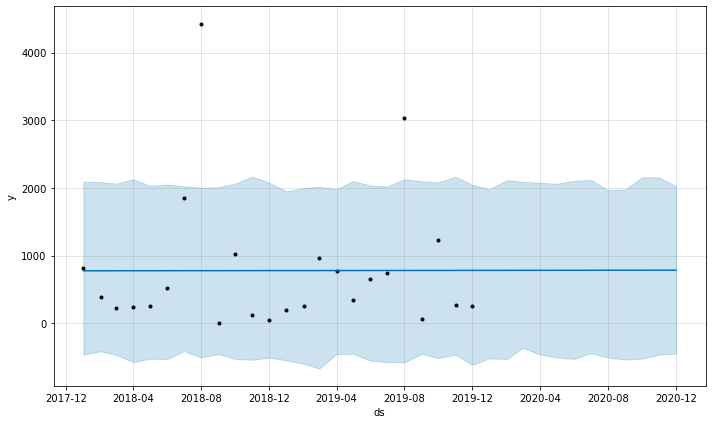

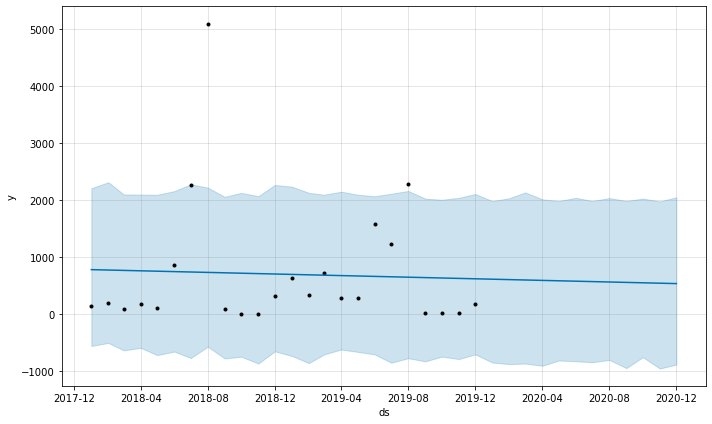

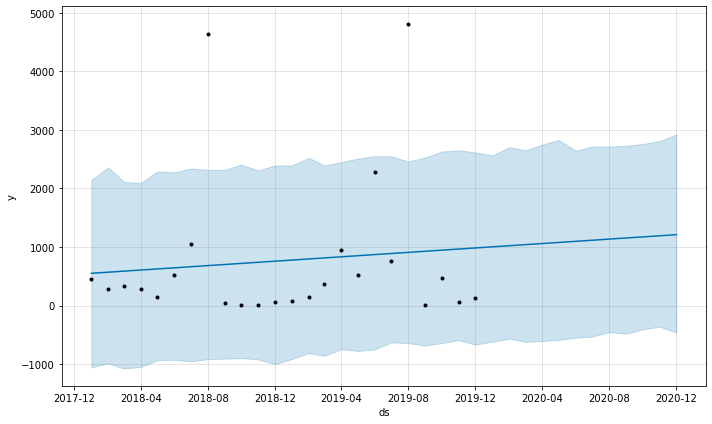

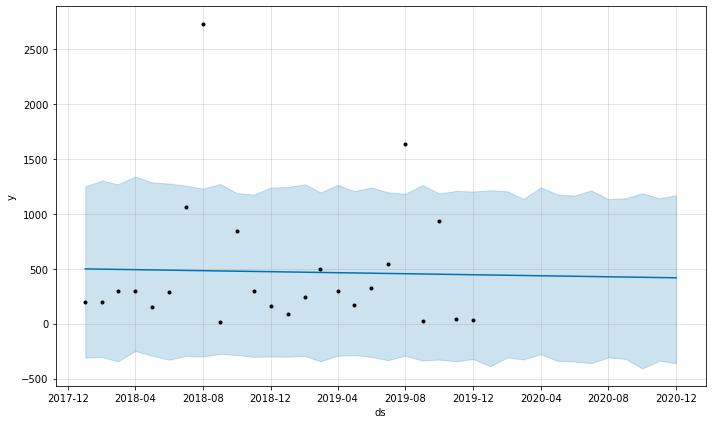

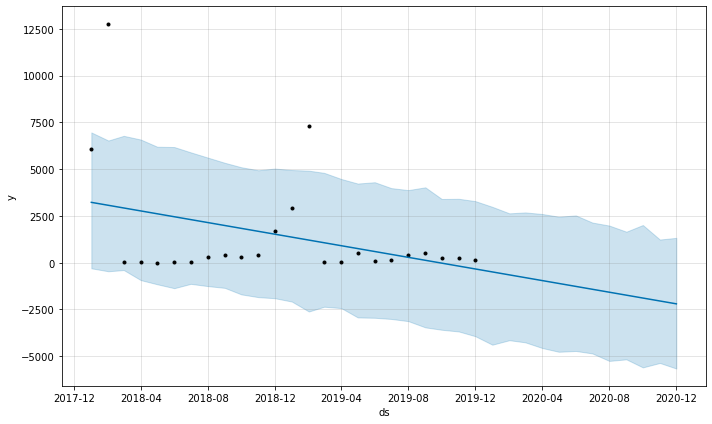

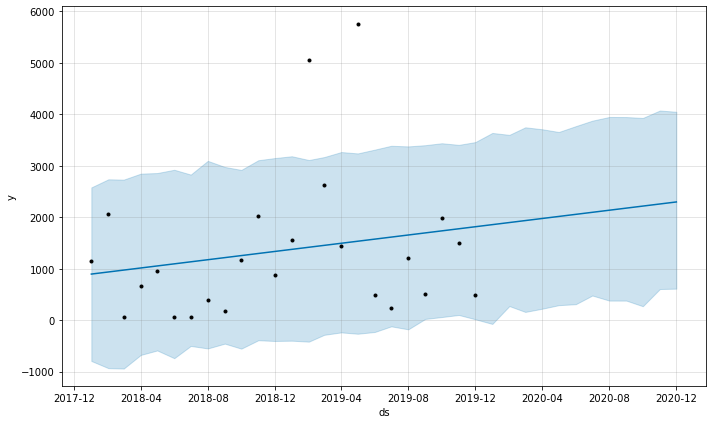

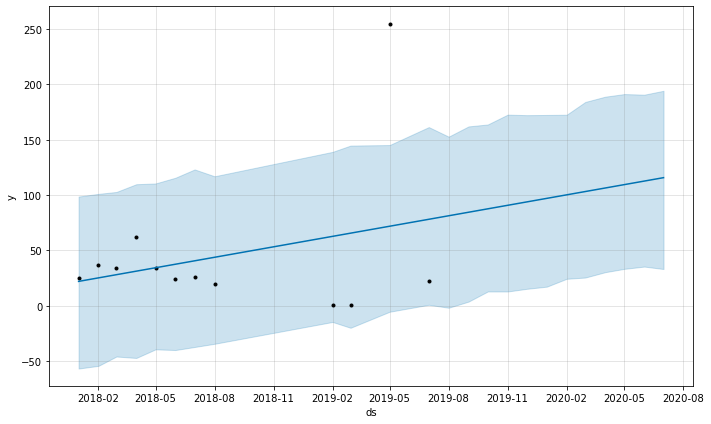

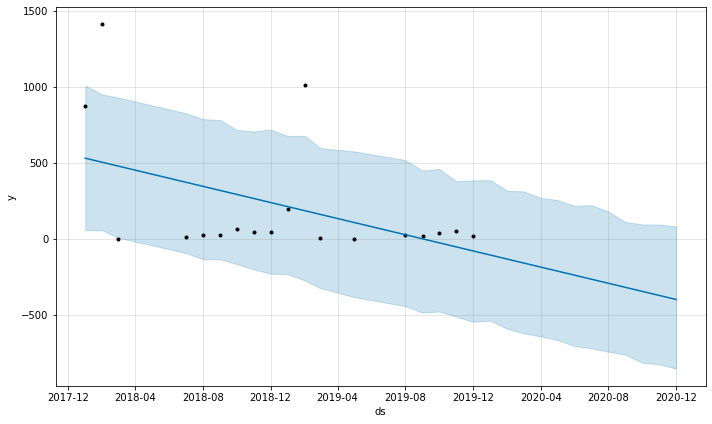

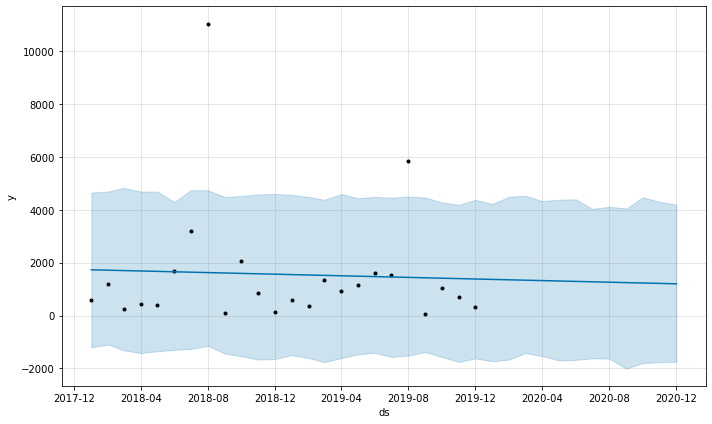

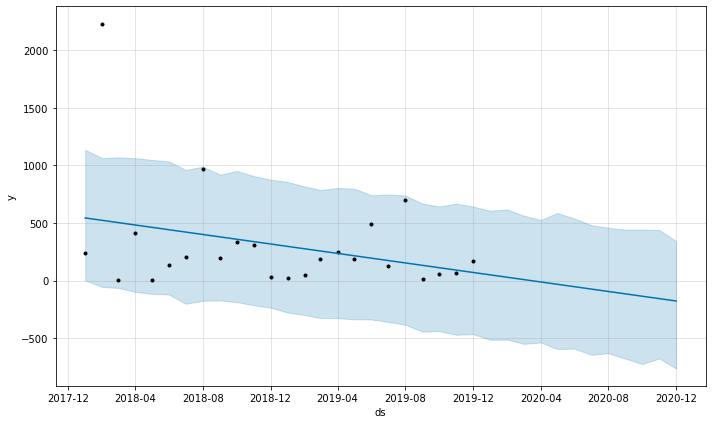

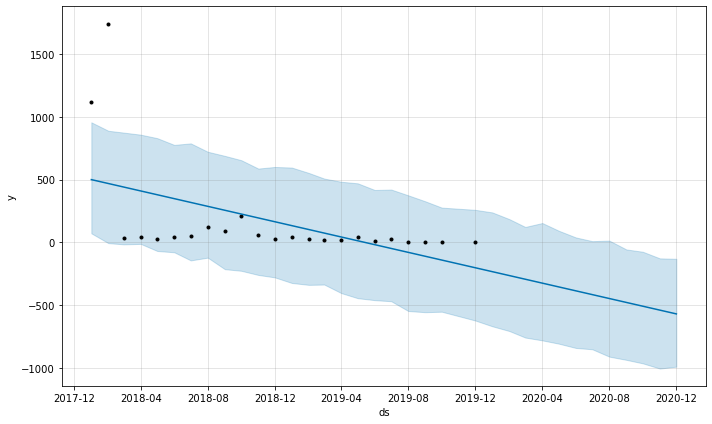

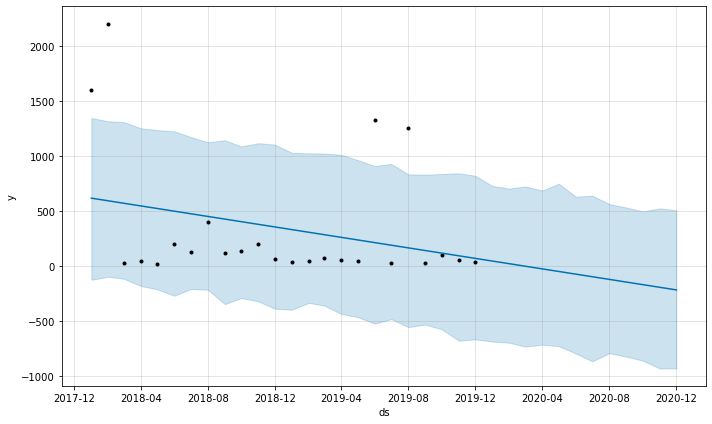

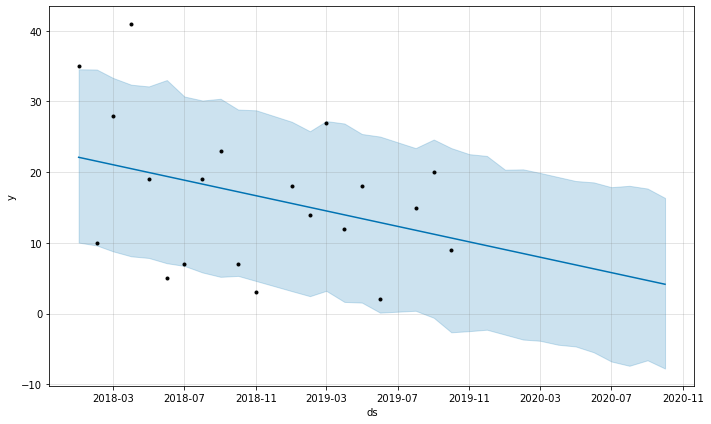

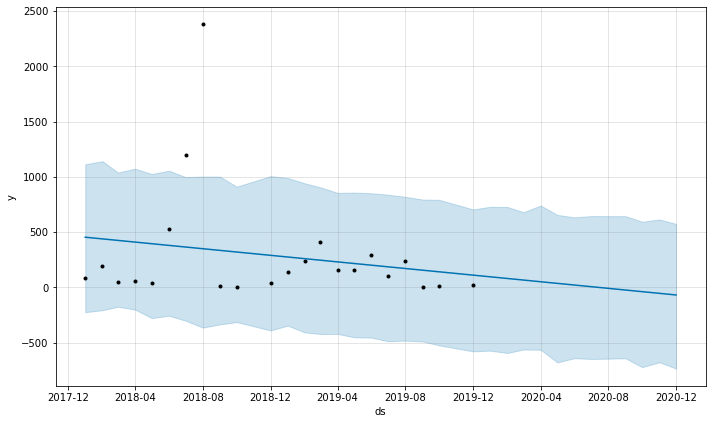

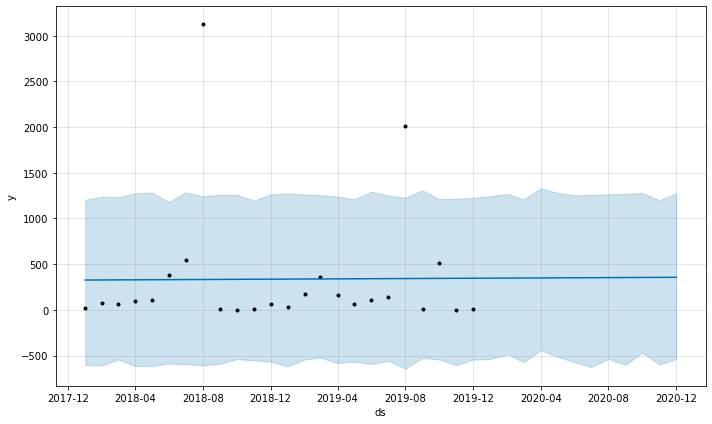

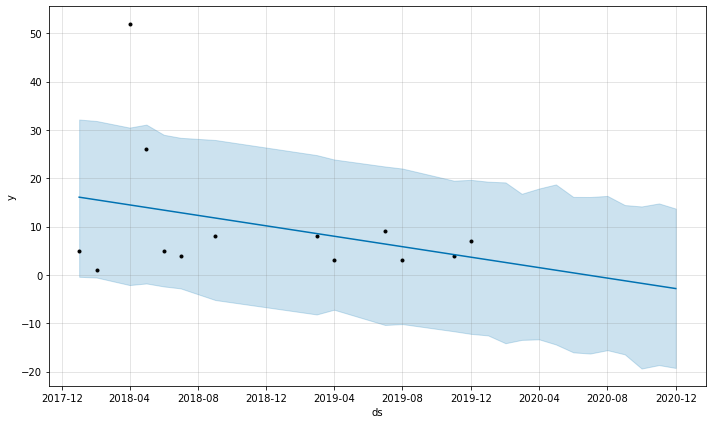

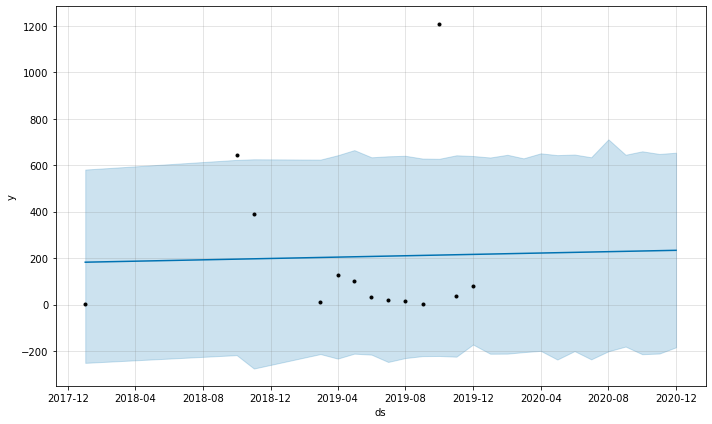

In [207]:
for index, row in ArticleGenre_df.iterrows():
    df_model = factOrder_df[factOrder_df['ArticleGenre'] == row['ArticleGenre']]
    df_model = df_model.loc[:, ['DateOrderedMonth', 'QuantityOrdered']]
    df_model = df_model.reset_index()
    df_model = df_model[['DateOrderedMonth', 'QuantityOrdered']]
    df_model.columns = ['ds', 'y']
    
    train, test = CreateSplitTestAndTrainData(df_model)
           
    model = CreateModel(train)
    ModelPrediction(model)

In [205]:
# Creating the common function for splitting the dataset into test and train samples
def CreateSplitTestAndTrainData(df_model):
    # Splitting the dataset into training and test
    train_end_year = '2019'
    train = df_model[pd.to_datetime(df_model['ds']).dt.strftime('%Y') <= train_end_year]
    test = df_model[pd.to_datetime(df_model['ds']).dt.strftime('%Y') > train_end_year]
        
    return train, test

In [195]:
def CreateModel(train):
    
    model = Prophet()
       
    # Fitting the model with the training dataset
    model.fit(train)
    
    return model

In [206]:
def ModelPrediction(model):
    # Create future dates for prediction
    future_dates = model.make_future_dataframe(periods=12, freq='MS')

    # Make predictions for future dates
    predictions = model.predict(future_dates)

    # Plot the prediction
    model.plot(predictions);
    #print(predictions)
    
    # Plot the prediction components
   # model.plot_components(predictions);

In [ ]:
predictions

In [ ]:
# Merge actual and predicted values
model_performance = pd.merge(test, predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-12:], on='ds')

# Check MAE value
model_performance_MAE = mean_absolute_error(model_performance['y'], model_performance['yhat'])
print(f'The MAE for the seasonality model is {model_performance_MAE}')

# Check MAPE value
model_performance_MAPE = mean_absolute_percentage_error(model_performance['y'], model_performance['yhat'])
print(f'The MAPE for the seasonality model is {model_performance_MAPE}')

In [ ]:
model_performance

In [ ]:
factOrder_df

In [ ]:
df_model

In [ ]:
future_data.info()

In [ ]:
future_dates

In [ ]:
ArticleGroupName_df

In [187]:
df_model

,ds,y
0,2018-01-01,1121.0
1,2018-01-01,5.0
2,2018-01-01,4167.0
3,2018-01-01,4.0
4,2018-01-01,12684.0
...,...,...
2391,2021-01-01,3.0
2392,2021-01-01,1.0
2393,2021-01-01,3.0
2394,2021-01-01,3.0
